In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
corona=pd.read_csv('./002_2.COVID-19.csv')
subway=pd.read_csv('./002_1.DAILY_SUBWAY_INFO.csv')
step=pd.read_csv('./001_3.CSV_SOCIAL_DISTANCE_STEP.csv')

In [3]:
# 일일 확진자 수 전처리
freq = corona.groupby(['DATE']).count()
corona_seoul=freq['ID']
corona_seoul=corona_seoul.rename('corona')
coro_seoul=corona_seoul[73:523]

#주간 합계
coroweeks=[]
for i in range(0,448,7):
    temp=coro_seoul[i:i+7].sum()
    coroweeks.append(temp)

In [4]:
#전철 이용자 수 전처리
subway_20200508=subway.drop(list(subway.index[:493]))

#주간 합계
subweeks_20200508=[]
for i in range(0,448,7):
    temp=subway_20200508['total'][i:i+7].sum()
    subweeks_20200508.append(temp)

In [5]:
#거리두기 단계 전처리
step=step.drop(list(step.index[519:]))
step_20200508=step.drop(list(step.index[:69]))

#주간 거리두기 단계
stepweeks_20200508=[]
for i in range(69,517,7):
    temp=step_20200508['step']
    stepweeks_20200508.append(temp[i])

In [6]:
# x축: 날짜 리스트
import datetime as dt
from datetime import timedelta as td

In [7]:
weeks_all=[]
for i in range(0,448,7):
    d=dt.datetime(2020,5,8)+td(days=i)
    weeks_all.append(d.strftime('%Y-%m-%d'))

In [8]:
x_weeks=[]
for i in range(64):
    if i%4==0:
        x_weeks.append(weeks_all[i])

###### 시각화

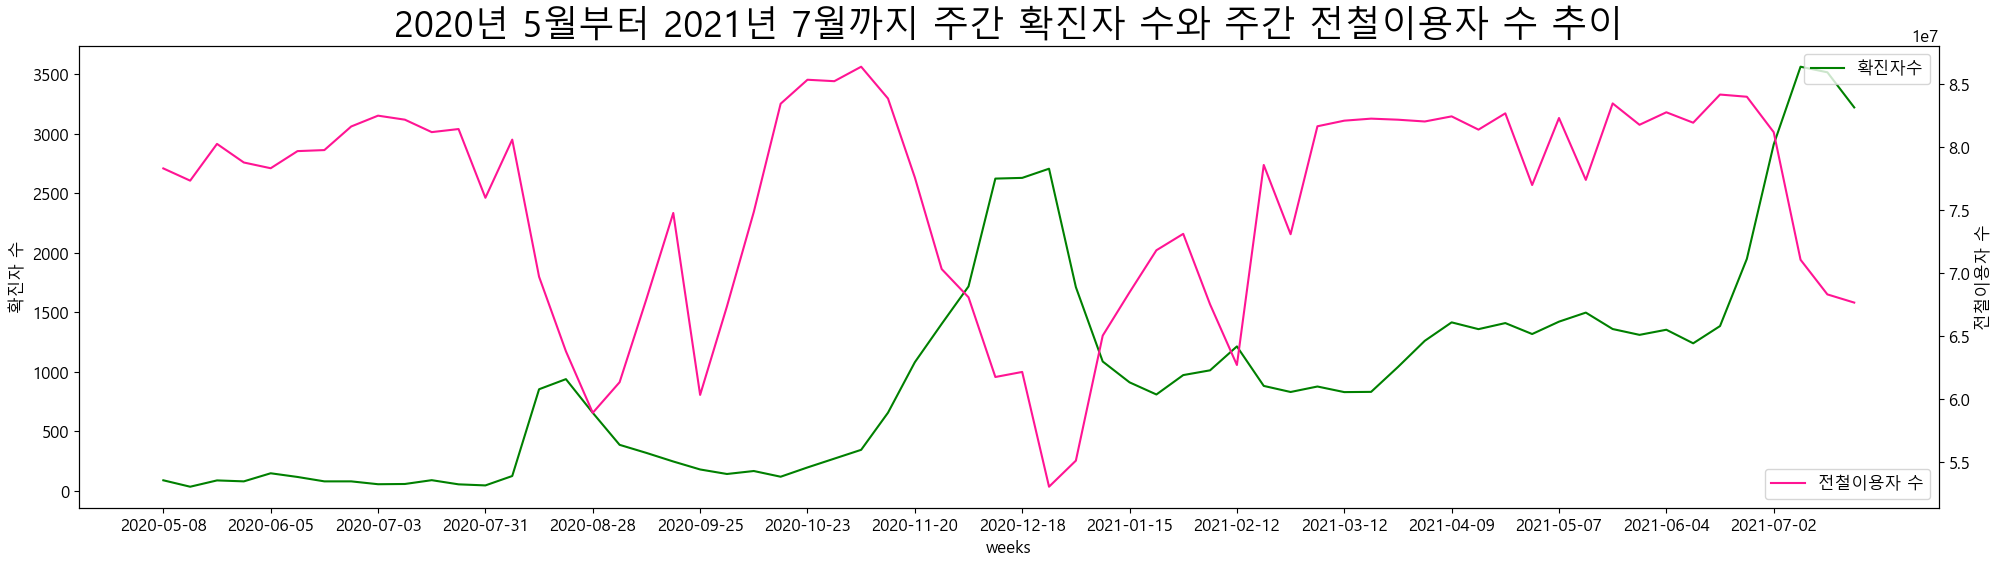

In [9]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (24, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')

fig, ax1 = plt.subplots()
ax1.plot(weeks_all,coroweeks, color='green', label='확진자수')
ax1.set_xlabel('weeks')
ax1.set_ylabel('확진자 수')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('전철이용자 수')
ax2.plot(weeks_all,subweeks_20200508, color='deeppink', label='전철이용자 수')
ax2.legend(loc='lower right')
plt.title('2020년 5월부터 2021년 7월까지 주간 확진자 수와 주간 전철이용자 수 추이', size=26)
plt.xticks(x_weeks)

import warnings
warnings.filterwarnings('ignore')

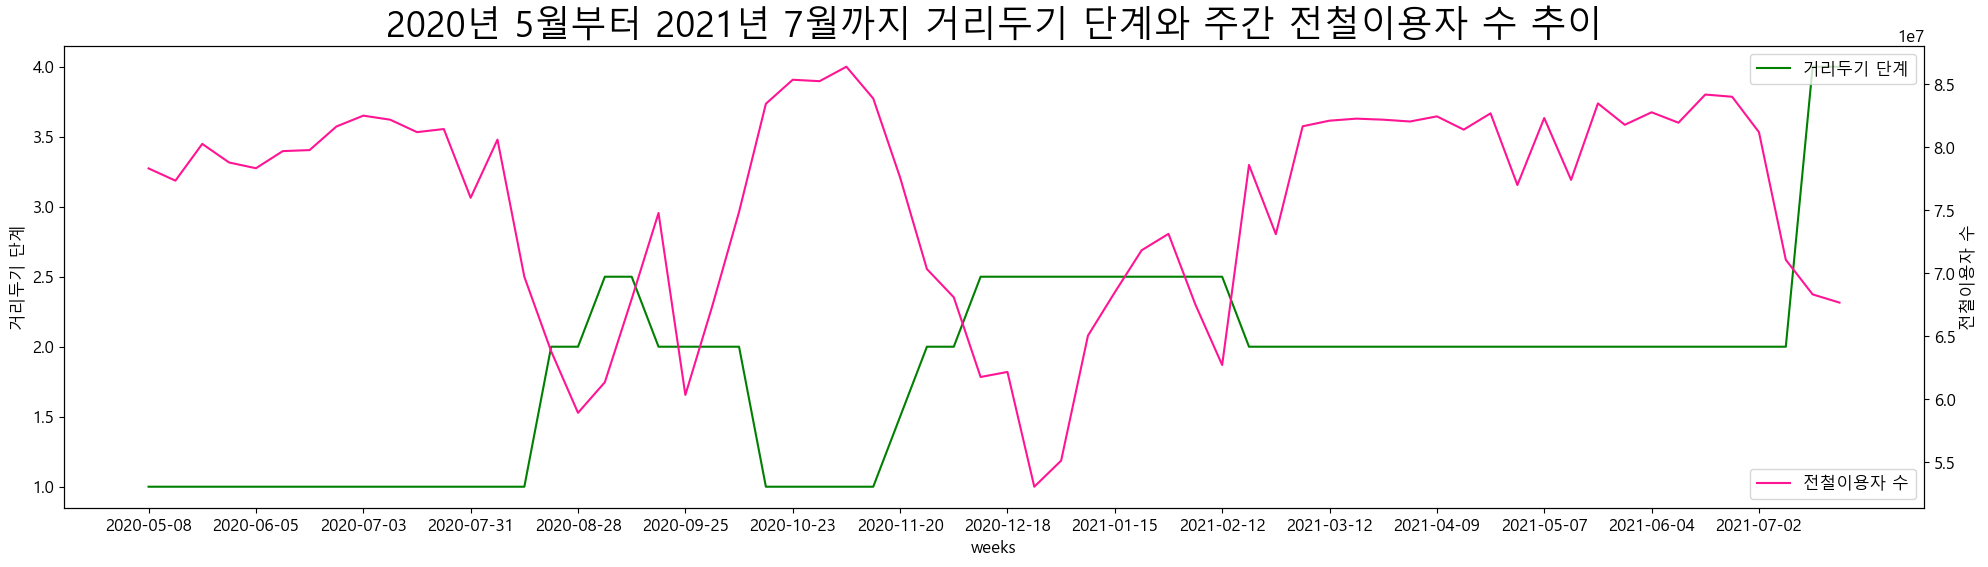

In [10]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (24, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')

fig, ax1 = plt.subplots()
ax1.plot(weeks_all,stepweeks_20200508, color='green', label='거리두기 단계')
ax1.set_xlabel('weeks')
ax1.set_ylabel('거리두기 단계')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('전철이용자 수')
ax2.plot(weeks_all,subweeks_20200508, color='deeppink', label='전철이용자 수')
ax2.legend(loc='lower right')
plt.title('2020년 5월부터 2021년 7월까지 거리두기 단계와 주간 전철이용자 수 추이', size=26)
plt.xticks(x_weeks)

import warnings
warnings.filterwarnings('ignore')

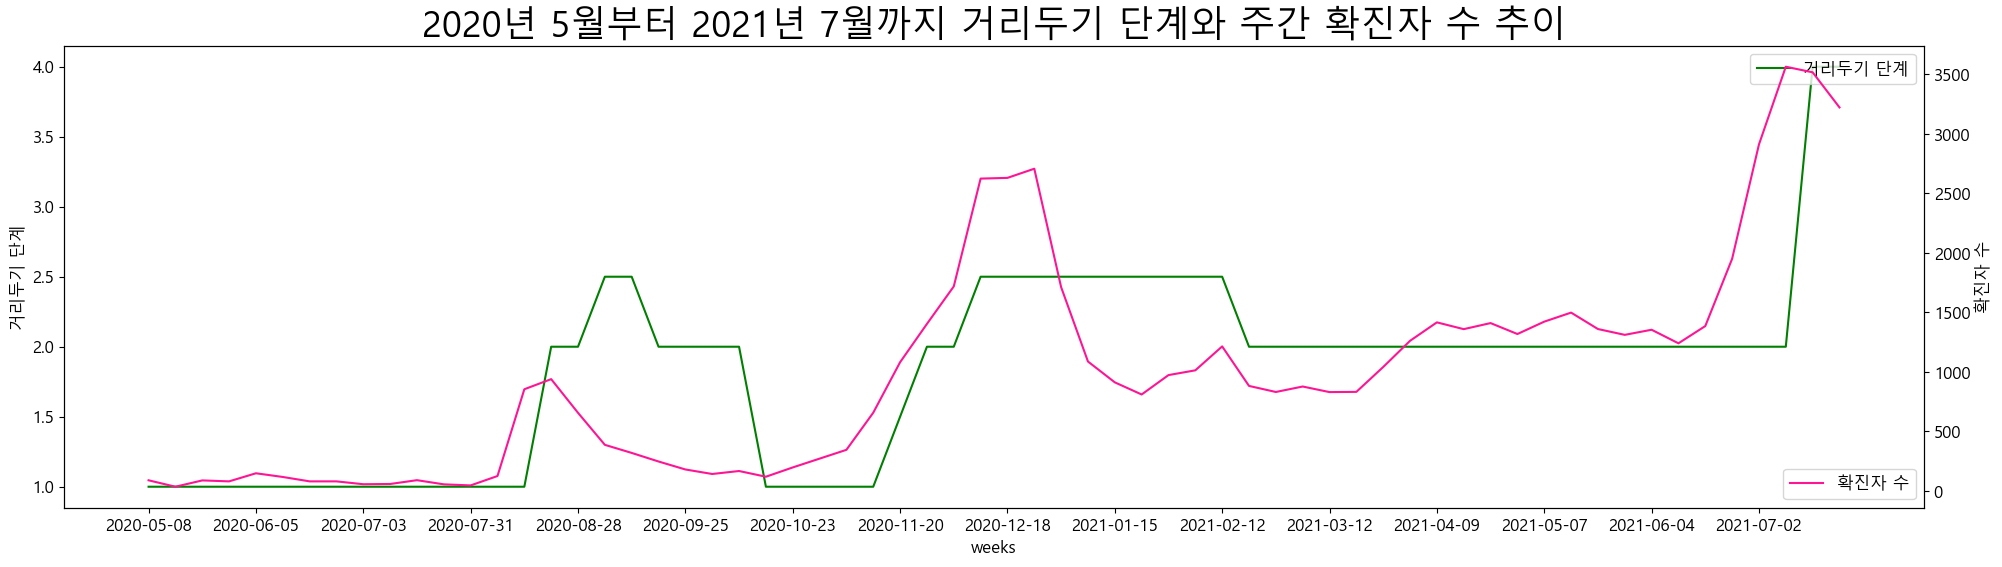

In [11]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (24, 6)
plt.rcParams['font.size'] = 12
plt.rc('font', family='Malgun Gothic')

fig, ax1 = plt.subplots()
ax1.plot(weeks_all,stepweeks_20200508, color='green', label='거리두기 단계')
ax1.set_xlabel('weeks')
ax1.set_ylabel('거리두기 단계')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.set_ylabel('확진자 수')
ax2.plot(weeks_all,coroweeks, color='deeppink', label='확진자 수')
ax2.legend(loc='lower right')
plt.title('2020년 5월부터 2021년 7월까지 거리두기 단계와 주간 확진자 수 추이', size=26)
plt.xticks(x_weeks)

import warnings
warnings.filterwarnings('ignore')

###### 상관계수

In [12]:
#주간 확진자수와 주간 전철이용자 수의 상관계수
from pandas import DataFrame
raw_data = {'coroweeks': coroweeks,
            'subweeks': subweeks_20200508}
freq=DataFrame(raw_data)
corr_cs=freq.corr()
round(corr_cs['coroweeks'][1],3)

-0.328

In [13]:
# 시간 차이(일주일 단위)에 따른 주간 확진자수와 주간 전철이용자 수의 상관계수
mpl.rcParams['axes.unicode_minus'] = False

# 20200508에서 14주 전인 20200131부터의 지하철 승객 수 추출
subway_20200131=subway[395:]
subweeks_20200131=[]
for i in range(0,546,7):
    temp=subway_20200131['total'][i:i+7].sum()
    subweeks_20200131.append(temp)

# 14주 까지 시간 차이를 보기 위해 주간 확진자 수 데이터 64개 중 50개 추출
import numpy as np
corr_coroweeks=coroweeks[:50]
corr_weekshift=[]
for i in range(28):
    corr_weekshift.append(np.corrcoef(subweeks_20200131[i:i+50], corr_coroweeks)[0][1])

# 4주 까지 시간 차이를 보기 위해 주간 확진자 수 데이터 64개 중 60개 추출
corr_coroweeks2=coroweeks[:60]
corr_weekshift2=[]
for i in range(8):
    corr_weekshift2.append(np.corrcoef(subweeks_20200131[i+10:i+70], corr_coroweeks2)[0][1])

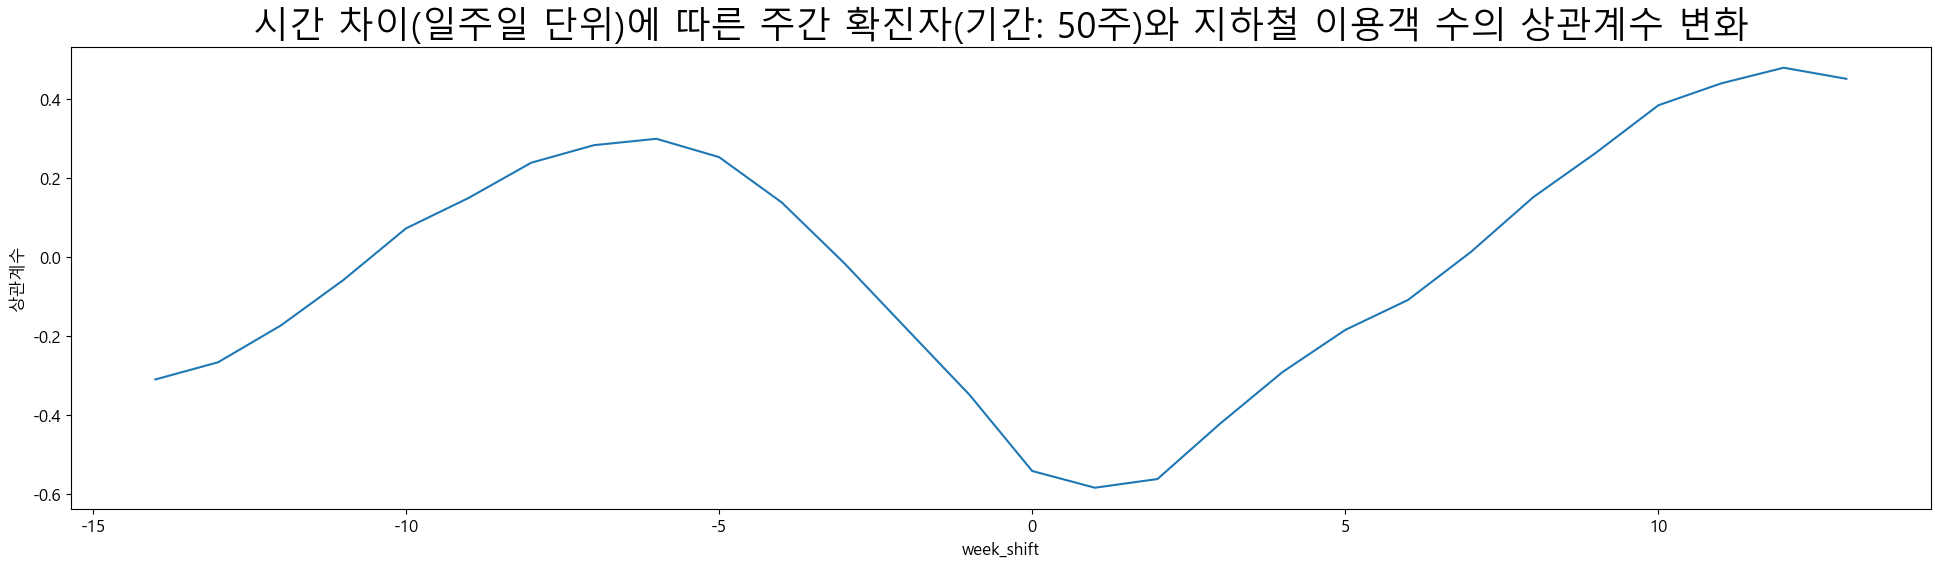

In [14]:
plt.title('시간 차이(일주일 단위)에 따른 주간 확진자(기간: 50주)와 지하철 이용객 수의 상관계수 변화', size=26)
plt.xlabel('week_shift')
plt.ylabel('상관계수')
plt.plot(range(-14,14),corr_weekshift)

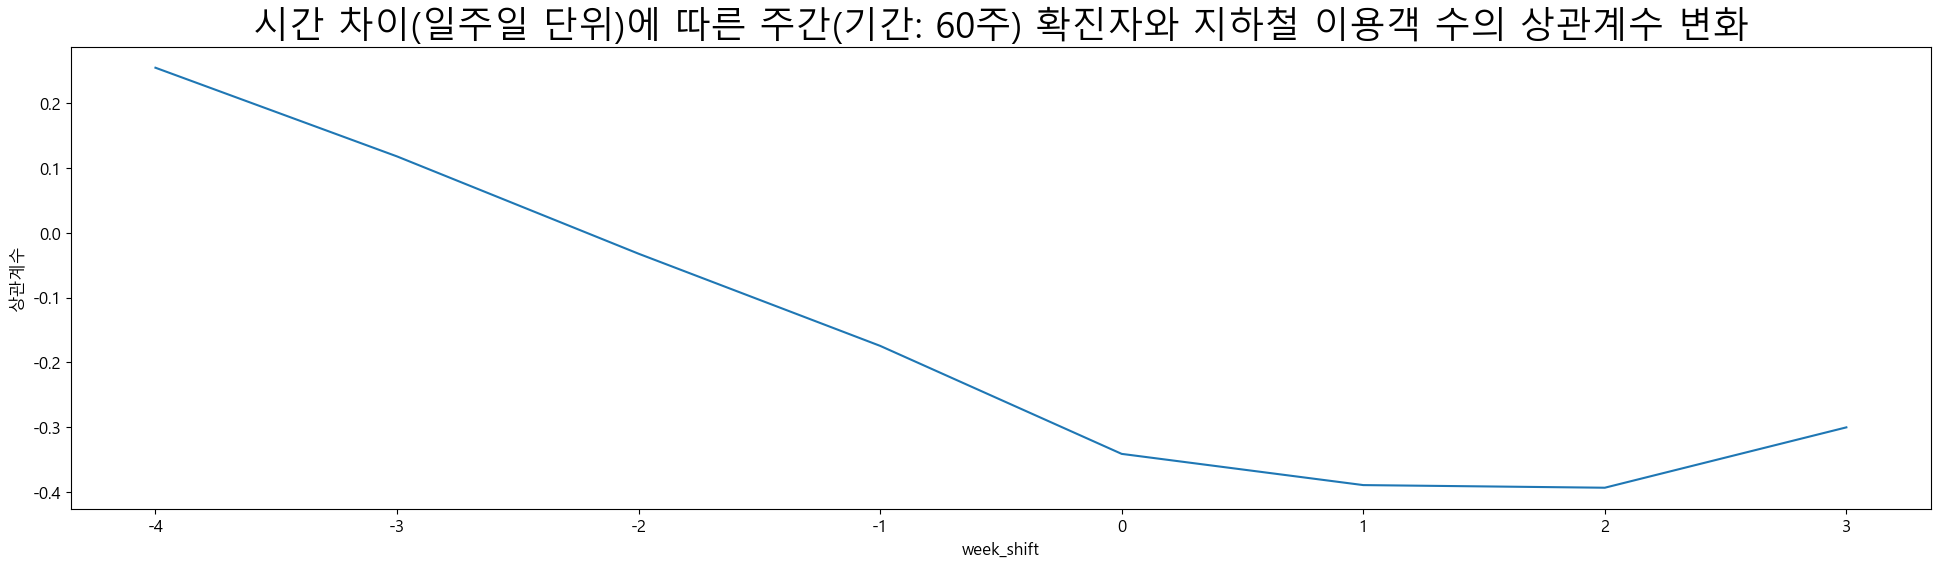

In [15]:
plt.title('시간 차이(일주일 단위)에 따른 주간(기간: 60주) 확진자와 지하철 이용객 수의 상관계수 변화', size=26)
plt.xlabel('week_shift')
plt.ylabel('상관계수')
plt.plot(range(-4,4), corr_weekshift2)